# Brain waves: Frequency Analysis

**Section 1: Creating Artificial Signals**
1. Generates and plots sinusoidal signals with specified amplitudes and frequencies.
2. Demonstrates the concept of superposition by combining multiple waves.
3. Creates and visualizes a superposed wave from 10 different waves with varied amplitudes and frequencies.


**Section 2: Simulating Brain Waves**
1. Simulates brain waves, including alpha, beta, gamma, and delta waves, with specified frequencies and amplitudes.
2. Combines these waves to create an activity signal.
3. Adds random noise to the activity signal to simulate real-world conditions.


**Section 3: Power Spectrum**
1. Introduces the concept of the power spectrum, a representation of power distribution across different frequencies in a signal.
2. Applies Fast Fourier Transform (FFT) to convert a noisy signal into the frequency domain.
3. Displays both time and frequency domain representations of the signal.
4. Highlights the use of power (amplitude squared) in the frequency domain for noise reduction.


**Section 4: Power Spectrum Of Real Data**
1. Filters and selects data corresponding to a specific brain area and trial.
2. Computes and visualizes the power spectrum of real LFP data from the selected brain area and trial.
3. Prompts the reader to interpret the power spectrum of the real data.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

**Libraries Used:**

- **xarray (xr):**
  - `xr.load_dataset(filename_or_obj=filepath)`: Loads a dataset from the specified file path using the xarray library. 

- **Pandas (pd):**
  - `to_dataframe()`: Converts the LFP and feedback data loaded from xarray into Pandas DataFrames. 

  - **DataFrame (df):**
    - `merge(on='trial', how='left')`: Merges the LFP and feedback DataFrames on the 'trial' column using a left join. This operation combines data from two sources into a single DataFrame, where the 'left' DataFrame is the primary one, and matching rows from the 'right' DataFrame (feedback) are added. Data with missing 'feedback_type' values is retained. 
    - 
    - **dropna(subset='feedback_type')**: Removes rows from the merged DataFrame where the 'feedback_type' column has missing values. 

Loading dataset

In [2]:
filepath = '/home/sangeetha/Work/Germany/bootcamp/data/steinmetz_neuromatch_dataset/steinmetz_2017-12-06_Lederberg.nc'
dset = xr.load_dataset(filename_or_obj=filepath)
lfp = dset['lfp'].to_dataframe().reset_index()
feedback = dset['feedback_type'].to_dataframe().reset_index()
df = lfp.merge(feedback, on='trial', how='left')
df = df.dropna(subset='feedback_type')

## Section 1: Creating Artificial signals

**Libraries Used:**

- **Matplotlib (plt)**
- **Numpy (np)**
  
**Methods Used:**

- `plt.plot()`: Plotting
- `np.linspace(low, high, npoints)`: Create an array from low to high second with npoints.
- `np.sin()`: trignometric sine
- `arr.sum(axis=0)`: calculates the sum of the elements in array arr along rows.
- `np.pi`: Value of pi (pi=3.142...).
- `arr.T`: transpose of numpy array arr (rows become columns and columns become rows).
- `arr[:, np.newaxis]`: if arr is a 1D array with shape (N,), this converts it to a 2D column vector.
  

**Exercises**

Create a sinusoidal signal with an amplitude of 1 unit and frequency of 0.5 Hz between times 0 and 1 second

Hint: \\y = A \sin(2 \pi f t)\\

In [3]:
A = 1.0 # unit
f = 0.5 # Hz
t = np.linspace(0.0, 1.0, 100) 
sig = A*np.sin(2*np.pi*f*t)

Plot the signal

Text(0, 0.5, 'Amplitude')

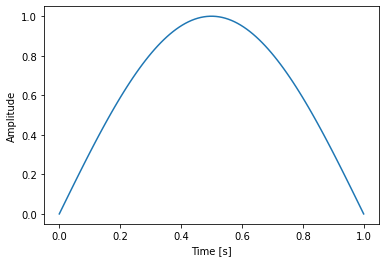

In [4]:
plt.plot(t, sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

Two or more waves can combine together to form a new wave. This is called superposition. Let's demonstrate that with another example

Create two waves y1 and y2 between times 0 and 1 second.

y1 has amplitude of 0.5 and frequency of 1 </br>
y2 has amplitude of 1 and frequency of 0.5

In [5]:
t = np.linspace(0, 1, 100)
y1 = 0.5*np.sin(2*np.pi*1.0*t)
y2 = 1.0*np.sin(2*np.pi*0.5*t)

Create another wave y which is a superposition of y1 and y2

Hint: y = y1 + y2

In [6]:
y = y1 + y2

Plot all the three waves and label them correctly

Text(0, 0.5, 'Amplitude [unit]')

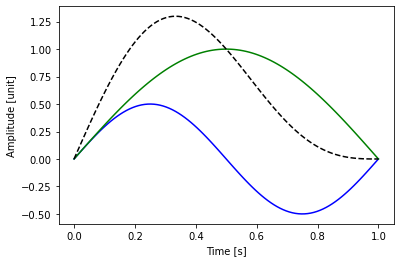

In [7]:
plt.plot(t,y1,color='b',label='y1')
plt.plot(t,y2,color='g',label='y2')
plt.plot(t,y,color='k', ls='--',label='y')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [unit]')

Let's create s bunch of waves and see how their superposition looks like

Create 10 waves with amplitudes randing from 1 to 5 units, frequencies between 0.5 Hz to 5 Hz (time range: 0 to 1 second)

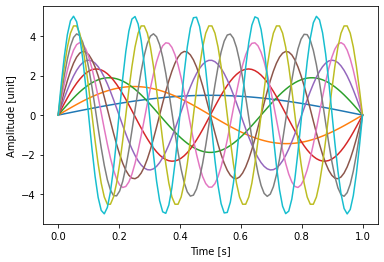

In [8]:
A = np.linspace(1,5,10)
f = np.linspace(0.5, 5, 10)
t = np.linspace(0.0, 1.0, 100)
sig = A[:, np.newaxis]*np.sin(2*np.pi*f[:, np.newaxis]*t)

plt.plot(t, sig.T)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [unit]');

Plot their sum (superposed wave) too!

Hint: Use .sum(axis=) to specify along which axis you want to sum 

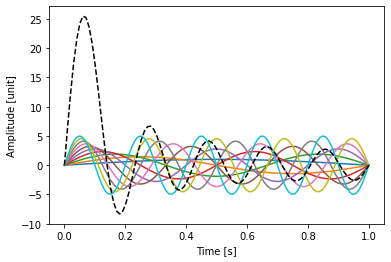

In [9]:
A = np.linspace(1,5,10)
f = np.linspace(0.5, 5, 10)
t = np.linspace(0.0, 1.0, 100)
sig = A[:, np.newaxis]*np.sin(2*np.pi*f[:, np.newaxis]*t)

plt.plot(t, sig.T)
plt.plot(t, sig.sum(axis=0), color='k', ls='--')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [unit]');

## Section 2: Simulating Brain Waves

**Methods used**

- np.random.normal(size=n): Generates n random values drawn from a normal distribution

**Exercises**

Let's simulate for kinds of brain waves between times 0.01 second to 250 second

alpha = (10.5, 110.)

beta = (22.5, 7.5)

gamma = (65., 5.5)

delta = (2.75, 110)

The first value in the tuple is frequency and the second value is the amplitude

Text(0, 0.5, 'Amplitude [unit]')

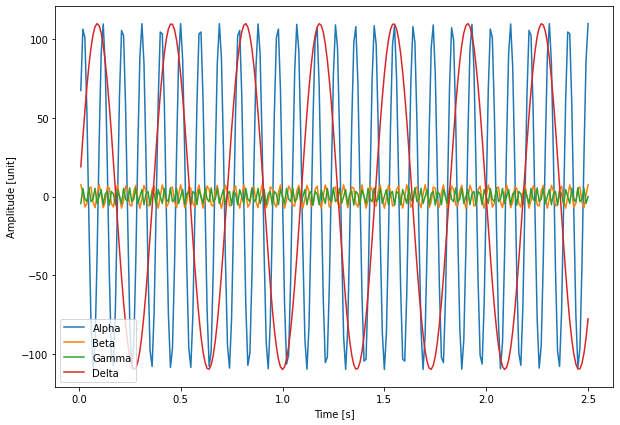

In [10]:
t = np.linspace(0.01,2.5,250)

# alpha = (8., 20.)
# beta = (13., 5.)
# gamma = (30., 1.)
# delta = (0.5, 20)

alpha = (10.5, 110.)
beta = (22.5, 7.5)
gamma = (65., 5.5)
delta = (2.75, 110)

sig_alpha = alpha[1]*np.sin(2.*np.pi*alpha[0]*t)
sig_beta = beta[1]*np.sin(2.*np.pi*beta[0]*t)
sig_gamma = gamma[1]*np.sin(2.*np.pi*gamma[0]*t)
sig_delta = delta[1]*np.sin(2.*np.pi*delta[0]*t)

plt.figure(figsize=(10,7))
plt.plot(t, sig_alpha, label='Alpha')
plt.plot(t, sig_beta, label='Beta')
plt.plot(t, sig_gamma, label='Gamma')
plt.plot(t, sig_delta, label='Delta')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [unit]')

Sum them up

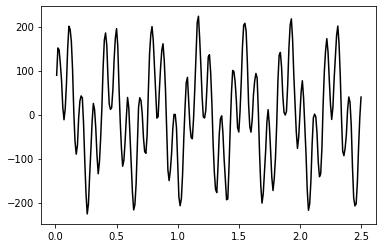

In [11]:
sig_activity = sig_alpha + sig_beta + sig_gamma + sig_delta
plt.plot(t, sig_activity, color='k')

This seems to be a perfect case without any external noise which, unfortunately, isn't something to be expected in a normal experimental setup. So let's add a random noise of amplitude 100 unit

Hint: Use np.random.normal(size=)

Text(0, 0.5, 'Amplitude [unit]')

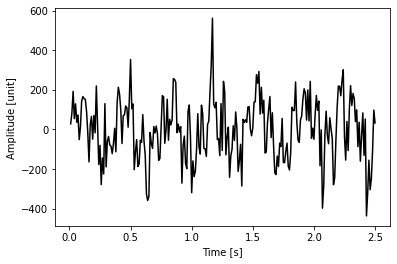

In [12]:
sig_activity_noise = sig_activity + 100*np.random.normal(size=len(t))
plt.plot(t, sig_activity_noise, color='k')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [unit]')

Now, it is getting harder to isolate different frequencies in this wave. Let's figure out how to identify different frequencies in this activity by converting to frequency domain

## Section 3: Power Spectrum

**Libraries**

- **Scipy**: Python library for scientific computing


**Methods**
- **fft(arr)**: computes Fast Fourier Transform of arr. 
- **fftfreq(n_freq, d=)**: generates array of frequencies with n_freq points given sample spacing d. Sample spacing is generally the difference between two consecutive times of measurement. 
- **np.abs()**: Calculates the absolute value.

A power spectrum is a representation of the distribution of power (or energy) across different frequencies in a signal, providing insights into the signal's frequency content. It is often used in signal analysis to identify dominant frequencies and their relative strengths.

**Exercises**

Let's first do a Fast Fourier Transform of our signal using fft from scipy.fft

In [13]:
fft_result = fft(sig_activity_noise)

Then, we will get frequencies using fftfreq from scipy.fftfreq

In [14]:
fft_freqs = fftfreq(len(sig_activity_noise), d=(t[1] - t[0]))

Positive and negative frequencies from FFT of a real-valued signal are symmetric. Focusing only on the positive part of the spectrum is good enough for real-world applications

Extract only the positive frequencies

In [15]:
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

Now, create a figure with two panels. Top panel has the signal and the bottom panel has the frequency domain representation of the signal (Fourier Transform)

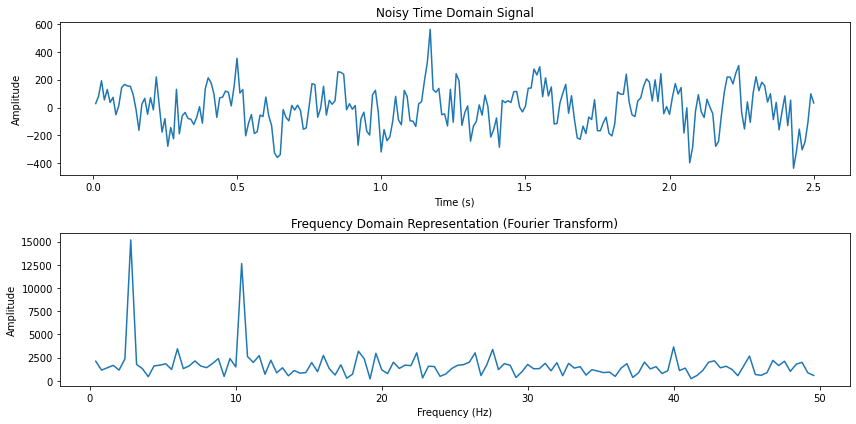

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sig_activity_noise)
plt.title('Noisy Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.title('Frequency Domain Representation (Fourier Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()

We can reduce the noise in the frequency domain by plotting power (amplitude**2) instead of amplitude

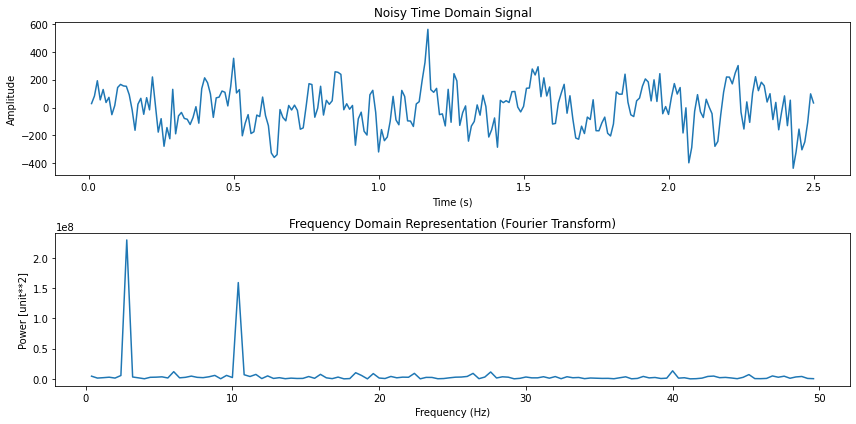

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sig_activity_noise)
plt.title('Noisy Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result**2)
plt.title('Frequency Domain Representation (Fourier Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [unit**2]')

plt.tight_layout()

We can see the 10.5 Hz and 2.75 Hz peaks representing alpha and delta waves respectively. It makes sense as they had highest amplitudes of the four states and also well within the frequency range that can be studied with this data.

We cannot see the 65 Hz gamma wave peak as it is beyond the frequency range that can be studied with the data we have (maximum frequency that can be studied is 2.0/dt Hz where dt is the sampling rate). We also cannot see the 22.5 Hz beta wave as the amplitude of it was too small. 

## Section 4: Power Spectrum Of Real Data

**Exercises**

Using the loaded data, filter the DataFrame (df) to select rows corresponding to a specific brain area and trial. We recommend-

Brain Area: one of VISam, MRN, RN, SCm

Trial Number: 2

In [18]:
brain_area_trial = df[(df.brain_area_lfp == 'PL') & (df.trial == 2)]

Create a power spectrum with time and lfp values

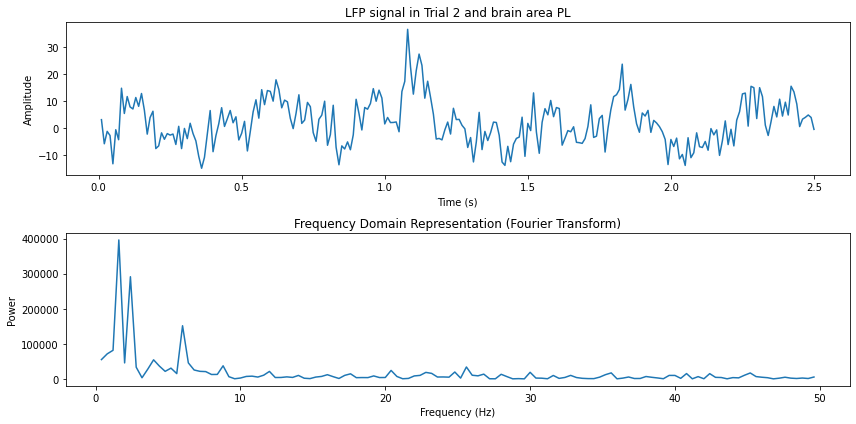

In [19]:
t = brain_area_trial.time.values
lfps = brain_area_trial.lfp.values

fft_result = fft(lfps)
fft_freqs = fftfreq(len(lfps), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = np.abs(fft_result[fft_freqs > 0])

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, lfps)
plt.title(f'LFP signal in Trial {brain_area_trial.trial.unique()[0]} and brain area {brain_area_trial.brain_area_lfp.unique()[0]}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result**2)
plt.title('Frequency Domain Representation (Fourier Transform)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.tight_layout()

What do you understand from this power spectrum? 